# Coupled Oscillators

This example demonstrates a system of two coupled damped harmonic oscillators using two ODE blocks.

The system consists of two masses connected by springs with damping. Each oscillator is coupled to the other through a coupling spring constant.

As a block diagram it would look like this:

Now let's implement this system in PathSim:

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Apply PathSim docs matplotlib style for consistent, theme-friendly figures
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import ODE, Function, Scope

## System Parameters

Next, let's define the system parameters:

In [49]:
# Mass parameters
m1 = 1.0
m2 = 1.5

# Spring constants
k1 = 2.0
k2 = 3.0
k12 = 0.5  # coupling spring constant

# Damping coefficients
c1 = 0.05
c2 = 0.1

# Initial conditions [position, velocity]
x1_0 = np.array([2.0, 0.0])  # oscillator 1 starts displaced
x2_0 = np.array([0.0, 0.0])  # oscillator 2 starts at rest

## Block Construction

Now we define the differential equations for each oscillator and create the ODE blocks:

In [52]:
# Define the differential equation for oscillator 1
def osc1_func(x1, u, t):
    """
    x1 = [position, velocity] of oscillator 1
    u = [force] external force due to coupling
    """
    f_e = u[0] # external force 
    
    dx1_dt = x1[1]  # velocity
    dv1_dt = (-k1*x1[0] - c1*x1[1] - f_e) / m1  # acceleration
    
    return np.array([dx1_dt, dv1_dt])

# Define the differential equation for oscillator 2
def osc2_func(x2, u, t):
    """
    x2 = [position, velocity] of oscillator 2
    u = [force] external force due to coupling
    """
    f_e = u[0] # external force 
    
    dx2_dt = x2[1]  # velocity
    dv2_dt = (-k2*x2[0] - c2*x2[1] - f_e) / m2  # acceleration
    
    return np.array([dx2_dt, dv2_dt])

# Define function for coupling of the oscillators
def coupling_func(x1, x2):
    f = k12 * (x1 - x2)
    return f, -f

# Create the ODE blocks
osc1 = ODE(osc1_func, x1_0)
osc2 = ODE(osc2_func, x2_0)

# Create Function block for coupling
fn = Function(coupling_func)

# Create a scope to visualize both oscillators
sc1 = Scope(labels=[r"$x_1(t)$ - Oscillator 1", r"$x_2(t)$ - Oscillator 2"])
sc2 = Scope(labels=[r"$f_e(t)$ - Coupling"])

blocks = [osc1, osc2, fn, sc1, sc2]

## Connections

Now we connect the blocks. The key aspect of this system is the coupling between the two oscillators:

In [55]:
connections = [
    Connection(osc1[0], fn[0], sc1[0]),
    Connection(osc2[0], fn[1], sc1[1]),
    Connection(fn[0], osc1[0], sc2[0]),
    Connection(fn[1], osc2[0]),
]

## Simulation Setup

Finally, we create the simulation:

In [66]:
sim = Simulation(blocks, connections, dt=0.01, log=True)

2025-10-20 12:35:40,388 - INFO - LOGGING (log: True)
2025-10-20 12:35:40,389 - INFO - BLOCK (type: ODE, dynamic: True, events: 0)
2025-10-20 12:35:40,389 - INFO - BLOCK (type: ODE, dynamic: True, events: 0)
2025-10-20 12:35:40,390 - INFO - BLOCK (type: Function, dynamic: False, events: 0)
2025-10-20 12:35:40,390 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-10-20 12:35:40,391 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-10-20 12:35:40,392 - INFO - GRAPH (size: 5, alg. depth: 2, loop depth: 0, runtime: 0.063ms)


## Running the Simulation

Now let's run the simulation and visualize the results:

2025-10-20 12:36:13,694 - INFO - RESET (time: 0.0)
2025-10-20 12:36:13,696 - INFO - STARTING -> TRANSIENT (Duration: 75.00s)
2025-10-20 12:36:13,697 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-10-20 12:36:13,783 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: --:--:--) | 1501 steps (17406.0 steps/s)
2025-10-20 12:36:13,857 - INFO - TRANSIENT:  40% | elapsed: 00:00:00 (eta: 00:00:00) | 3000 steps (20295.5 steps/s)
2025-10-20 12:36:13,926 - INFO - TRANSIENT:  60% | elapsed: 00:00:00 (eta: 00:00:00) | 4501 steps (21509.4 steps/s)
2025-10-20 12:36:13,996 - INFO - TRANSIENT:  80% | elapsed: 00:00:00 (eta: 00:00:00) | 6001 steps (21601.7 steps/s)
2025-10-20 12:36:14,066 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 7500 steps (21389.3 steps/s)
2025-10-20 12:36:14,067 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 7500 steps (20234.5 avg steps/s)
2025-10-20 12:36:14,067 - INFO - FINISHED -> TRANSIENT (total step

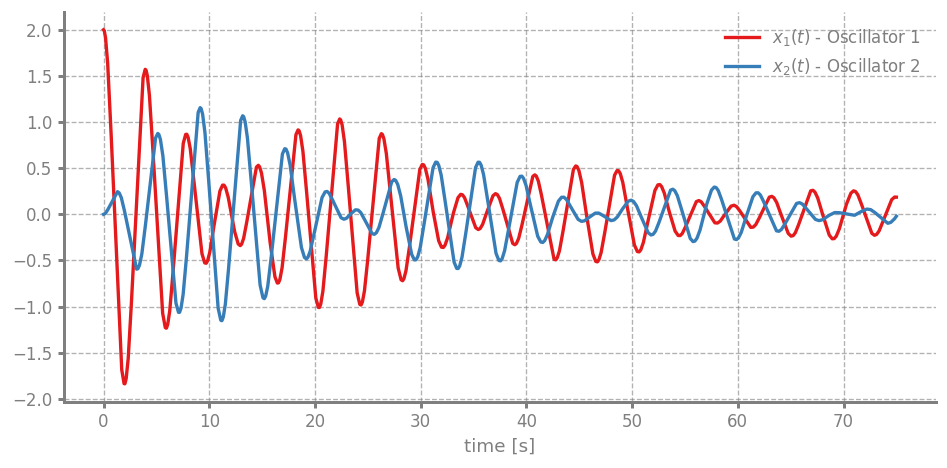

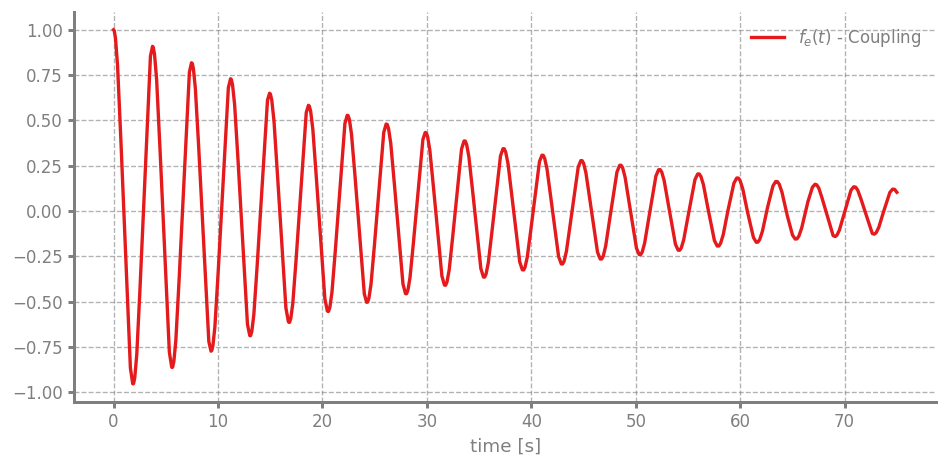

In [72]:
# Run the simulation
sim.run(duration=75, reset=True)

# Plot the results
fig, ax = sc1.plot()
fig, ax = sc2.plot()
plt.show()

## Analysis

The plot shows the position of both oscillators over time. Notice how:

1. **Energy Transfer**: The initially displaced oscillator 1 transfers energy to oscillator 2 through the coupling spring.
2. **Damped Motion**: Both oscillators gradually lose energy due to damping, eventually settling to rest.
3. **Coupled Dynamics**: The motion of each oscillator is influenced by the other, creating a complex interplay.

This example demonstrates how PathSim can elegantly handle coupled differential equations using multiple ODE blocks that exchange information through connections, making it easy to model systems with interacting components.